In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def rk4(f, a, b, N, r0, params = []):
    h = (b - a) / N
    ts = np.linspace(a, b, N)
    r = np.zeros((len(r0), N), float)
    r[:, 0] = r0
    for i, t in enumerate(ts[1:]):
        r_t = r[:,i]
        k1 = h * f(r_t, t, *params)
        k2 = h * f(r_t + .5 * k1, t + .5 * h, *params)
        k3 = h * f(r_t + .5 * k2, t + .5 * h, *params)
        k4 = h * f(r_t + k3, t + h, *params)
        r[:,i + 1] = r_t + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return ts, r

$$ \frac{d \theta}{dt} = \omega $$

$$ \frac{d \omega}{dt} = - \frac{g}{l} \sin \theta + C \cos \theta \sin \Omega t  $$

In [4]:
def f(r, t, l, g, c, omega):
    x, y = r
    i, j = y, -g/l * np.sin(x) + c*np.cos(x)*np.sin(omega * t)
    return np.array([i, j])

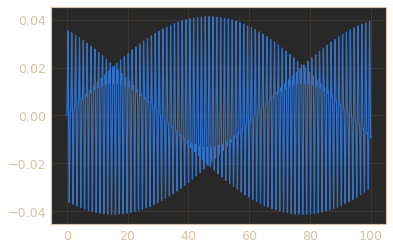

In [5]:
t, r = rk4(f, 0, 100, 10000, [0, 0], [.1, 9.8, 2, 5])
plt.plot(t, r[0])
plt.show()

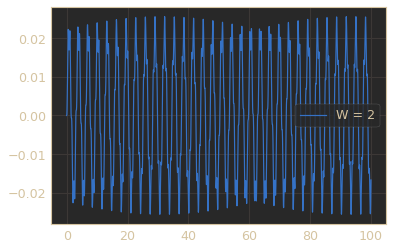

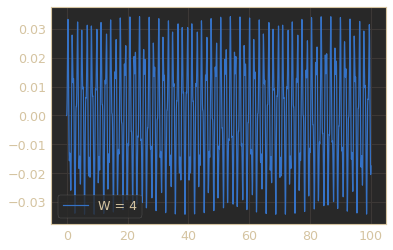

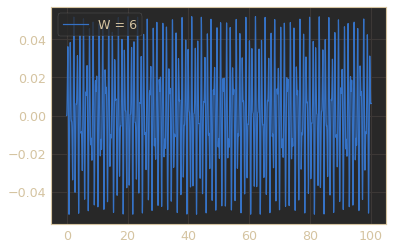

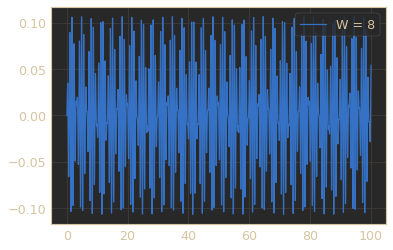

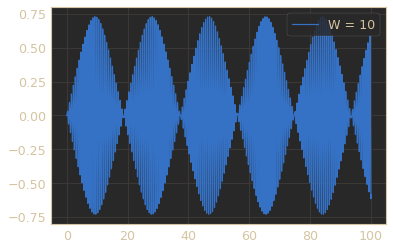

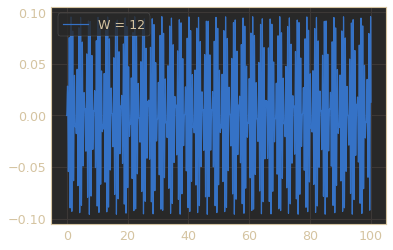

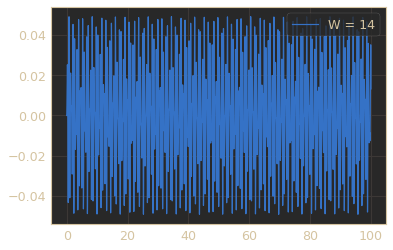

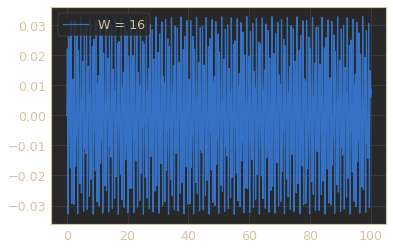

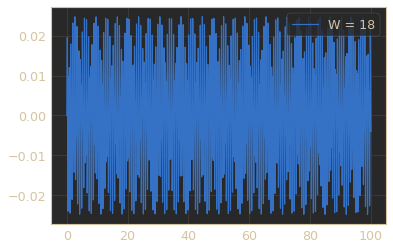

In [8]:
omegas = np.arange(2, 20, 2)
for omega in omegas:
    t, r = rk4(f, 0, 100, 10000, [0, 0], [.1, 9.8, 2, omega])
    plt.plot(t, r[0], label="W = {}".format(omega))
    plt.legend()
    plt.show()

Concluímos que a ressonância equivale a $\Omega = 10 s^{-1}$.